In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [15]:
bias=100
X,y,coef=make_regression(n_features=1,noise=10,bias=bias,random_state=42,coef=True) # bias==c , coef==m

In [16]:
X.shape, y.shape

((100, 1), (100,))

plt.scatter?

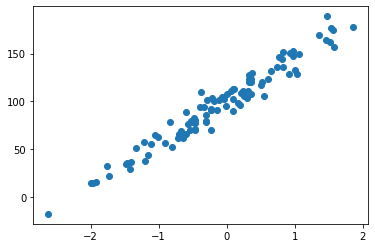

In [17]:
plt.scatter(X,y)

In [19]:
coef, bias # here i have m and c from sklearn

(array(41.74110031), 100)

In [20]:
y_gen=X*coef + bias # line generated 

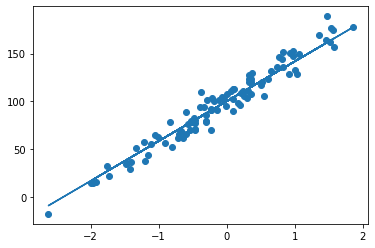

In [21]:
plt.scatter(X,y)
plt.plot(X,y_gen)

# plt a line using linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()

In [24]:
model.fit(X,y) # work during training

LinearRegression()

In [26]:
model.coef_,model.intercept_

(array([44.43716999]), 101.16511532052698)

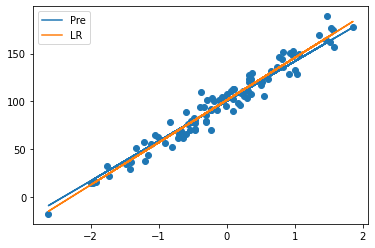

In [29]:
plt.scatter(X,y)
plt.plot(X,y_gen,label="Pre")
plt.plot(X,model.predict(X),label="LR")
plt.legend()

In [30]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    # training function i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
        
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [31]:
model = LinearRegCustom(lr=.1)

In [32]:
errors = model.fit(X, y)

In [33]:
model.coef_, model.intercept_

(43.26093584921256, 100.2996945566333)

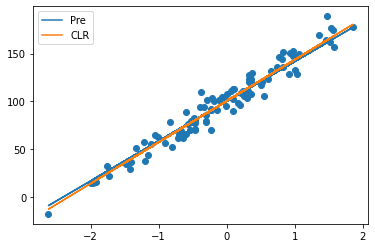

In [34]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

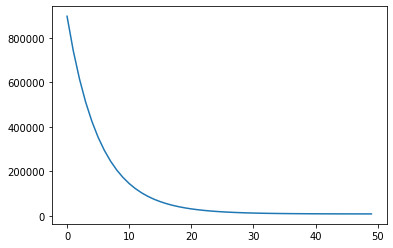

In [35]:
plt.plot(errors)

# Housing Problem

In [36]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [38]:
X,y=load_boston(return_X_y=True)

In [39]:
boston=load_boston()

In [48]:
c=np.array(boston)

In [56]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
y.shape,X.shape # so, MEDV is y

((506,), (506, 13))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [67]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
model.predict(X_test[:5])

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ])

In [69]:
y_test[:5]

array([23.6, 32.4, 13.6, 22.8, 16.1])

# Salary Dataset

In [71]:
import requests
url = 'https://raw.githubusercontent.com/codeforcauseorg/ML-Bootcamp-July/master/session%20-%209/Salary_Data.csv'
res = requests.get(url, allow_redirects=True)
with open('salary.csv','wb') as file:
    file.write(res.content)
sales_team = pd.read_csv('sales_team.csv')

In [72]:
dataset=pd.read_csv("salary.csv")

In [74]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [76]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [77]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [78]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [ ]:
# continue same process